In [1]:
import matplotlib.pyplot as plt
import numpy as np
import h5py
import xarray as xr

In [2]:
#101 sim sampling 00000
file_path2 = r'Z:\00_Simulation_data\109_helix_2.5deg\post_processing\sampling00000.nc'

with h5py.File(file_path2, 'r') as h5file:
    # Print the structure of the file
    print("File structure:")
    h5file.visit(print)

    
    definit='xzplane'
    ds_def_xz = xr.open_dataset(file_path2, engine='h5netcdf',group=definit)  
    definit='xyplane'
    ds_def_xy = xr.open_dataset(file_path2, engine='h5netcdf',group=definit) 
    definit='WTG01_5D'
    ds_def_5D = xr.open_dataset(file_path2, engine='h5netcdf',group=definit) 
    



vel_xy=ds_def_xy.velocityx.values
coord_xy=ds_def_xy.coordinates.values

coord_xz=ds_def_5D.coordinates.values

File structure:
WTG01_0D
WTG01_0D/coordinates
WTG01_0D/num_points
WTG01_0D/velocityx
WTG01_0D/velocityy
WTG01_0D/velocityz
WTG01_2D
WTG01_2D/coordinates
WTG01_2D/num_points
WTG01_2D/velocityx
WTG01_2D/velocityy
WTG01_2D/velocityz
WTG01_4D
WTG01_4D/coordinates
WTG01_4D/num_points
WTG01_4D/velocityx
WTG01_4D/velocityy
WTG01_4D/velocityz
WTG01_5D
WTG01_5D/coordinates
WTG01_5D/num_points
WTG01_5D/velocityx
WTG01_5D/velocityy
WTG01_5D/velocityz
WTG01_6D
WTG01_6D/coordinates
WTG01_6D/num_points
WTG01_6D/velocityx
WTG01_6D/velocityy
WTG01_6D/velocityz
WTG01_7D
WTG01_7D/coordinates
WTG01_7D/num_points
WTG01_7D/velocityx
WTG01_7D/velocityy
WTG01_7D/velocityz
ndim
num_time_steps
time
xyplane
xyplane/coordinates
xyplane/num_points
xyplane/velocityx
xyplane/velocityy
xyplane/velocityz
xyptw
xyptw/coordinates
xyptw/num_points
xyptw/velocityx
xyptw/velocityy
xyptw/velocityz
xzplane
xzplane/coordinates
xzplane/num_points
xzplane/velocityx
xzplane/velocityy
xzplane/velocityz


In [ ]:
#baseline simulation

D=283.21
WS=7
x_domain=4400
velocity_airmass=0.7 * WS #initial guess


time_in=(x_domain/velocity_airmass)+600

time_frame_xy=vel_xy[round(time_in)]
prova_time_frame_matrix_xy=time_frame_xy.reshape(280, 560)
coordinates_def_xy=ds_def_xy.coordinates.values
index_arrayx_xy=coordinates_def_xy[:,0]
indices_x_xy =np.array( np.where((index_arrayx_xy >= 1195) & (index_arrayx_xy <= 1205)))[0,0]
mean_provadef_matrix_fin_xy= prova_time_frame_matrix_xy[:, indices_x_xy:]


fig = plt.figure(figsize=(10, 8))
plt.imshow(prova_time_frame_matrix_xy , cmap='RdBu', interpolation='nearest',vmin=0,vmax=WS)
plt.axvline(x=5*D/10, color='r', linestyle='--', label='5D')
plt.colorbar()  
plt.title('Simulation data xy')
plt.legend()
plt.show()


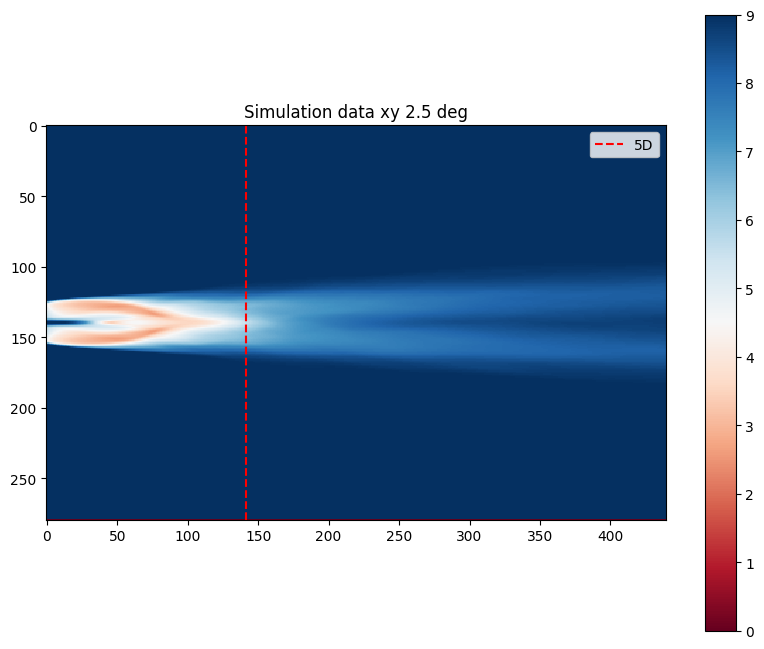

In [4]:
#helix

st=0.2825
D=283.21 
WS=9
x_domain=4400
velocity_airmass=0.7 * WS

frequency=st*WS/D
time_one_revolution=2/frequency

time_in=2*(x_domain/velocity_airmass+300)
time_simulations=6001 #end time
delta_time=time_simulations-time_in
revolutions=np.floor(delta_time/time_one_revolution)
time_fin=time_in+revolutions*time_one_revolution

time_frame_xy=np.mean(vel_xy[round(time_in):round(time_fin)], axis=0)




prova_time_frame_matrix_xy=time_frame_xy.reshape(280, 560)
coordinates_def_xy=ds_def_xy.coordinates.values
index_arrayx_xy=coordinates_def_xy[:,0]
indices_x_xy =np.array( np.where((index_arrayx_xy >= 1195) & (index_arrayx_xy <= 1205)))[0,0]

mean_provadef_matrix_fin_xy= prova_time_frame_matrix_xy[:, indices_x_xy:]

fig = plt.figure(figsize=(10, 8))
plt.imshow(mean_provadef_matrix_fin_xy , cmap='RdBu', interpolation='nearest',vmin=0,vmax=9)
plt.axvline(x=5*D/10, color='r', linestyle='--', label='5D')
plt.colorbar()  
plt.title('Simulation data xy 2.5 deg')
plt.legend()
plt.show()

np.savetxt('109_helix_2.5deg_xy.1.txt', mean_provadef_matrix_fin_xy)


